In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import os
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

import missingno as msno

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 추가
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 1. 데이터 불러오기

In [2]:
rawdata = pd.read_csv('./Soyang_2022.csv')
rawdata.index = pd.to_datetime(rawdata['날짜'])
rawdata = rawdata.drop(columns=['날짜'])
rawdata.columns = ['Temp', 'Precip', 'Inflow']

# 1개월 전 ~ 12개월 전 월 강수량 데이터 생성
rawdata['Precip_1'] = rawdata['Precip'].shift(1)
rawdata['Precip_2'] = rawdata['Precip'].shift(2)
rawdata['Precip_3'] = rawdata['Precip'].shift(3)
rawdata['Precip_4'] = rawdata['Precip'].shift(4)
rawdata['Precip_5'] = rawdata['Precip'].shift(5)
rawdata['Precip_6'] = rawdata['Precip'].shift(6)
rawdata['Precip_7'] = rawdata['Precip'].shift(7)
rawdata['Precip_8'] = rawdata['Precip'].shift(8)
rawdata['Precip_9'] = rawdata['Precip'].shift(9)
rawdata['Precip_10'] = rawdata['Precip'].shift(10)
rawdata['Precip_11'] = rawdata['Precip'].shift(11)
rawdata['Precip_12'] = rawdata['Precip'].shift(12)

rawdata = rawdata.dropna()
rawdata

,Temp,Precip,Inflow,Precip_1,Precip_2,Precip_3,Precip_4,Precip_5,Precip_6,Precip_7,Precip_8,Precip_9,Precip_10,Precip_11,Precip_12
날짜,,,,,,,,,,,,,,,
1975-01-01,-4.9,8.2,3.43,11.5,9.3,37.1,98.5,239.0,184.4,47.1,193.4,102.7,36.5,14.0,8.5
1975-02-01,-2.6,7.1,4.04,8.2,11.5,9.3,37.1,98.5,239.0,184.4,47.1,193.4,102.7,36.5,14.0
1975-03-01,2.6,40.0,12.47,7.1,8.2,11.5,9.3,37.1,98.5,239.0,184.4,47.1,193.4,102.7,36.5
1975-04-01,11.2,67.8,61.89,40.0,7.1,8.2,11.5,9.3,37.1,98.5,239.0,184.4,47.1,193.4,102.7
1975-05-01,14.8,91.4,45.39,67.8,40.0,7.1,8.2,11.5,9.3,37.1,98.5,239.0,184.4,47.1,193.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-01,12.0,83.8,33.21,18.3,0.9,43.4,5.4,61.8,114.9,227.1,460.1,151.2,356.3,9.0,29.2
2023-05-01,17.0,104.8,60.16,83.8,18.3,0.9,43.4,5.4,61.8,114.9,227.1,460.1,151.2,356.3,9.0
2023-06-01,21.7,229.0,56.17,104.8,83.8,18.3,0.9,43.4,5.4,61.8,114.9,227.1,460.1,151.2,356.3


# 2. 데이터 시각화

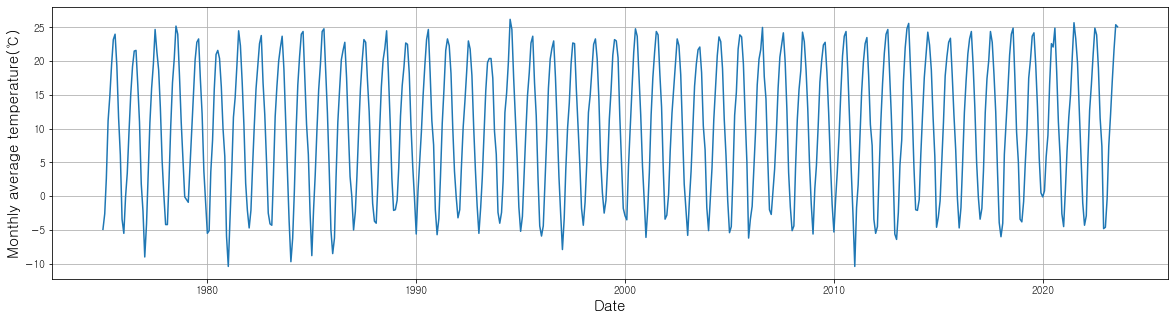

In [3]:
# 월 평균 기온 시각화
plt.figure(figsize=(20, 5))
plt.plot(rawdata['Temp'])
plt.grid()
plt.ylabel('Monthly average temperature(℃)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.show()

In [4]:
# 월 평균 기온 기초 통계량
rawdata['Temp'].describe()

count    584.000000
mean      10.247432
std        9.918499
min      -10.400000
25%        1.075000
50%       11.200000
75%       19.400000
max       26.200000
Name: Temp, dtype: float64

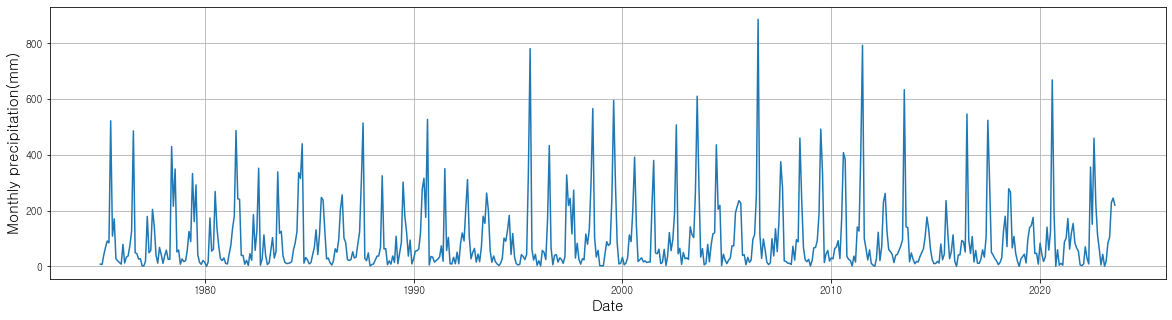

In [5]:
# 월 강수량 시각화
plt.figure(figsize=(20, 5))
plt.plot(rawdata['Precip'])
plt.grid()
plt.ylabel('Monthly precipitation(mm)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.show()

In [6]:
# 월 강수량 기초통계량
rawdata['Precip'].describe()

count    584.000000
mean      98.384589
std      127.806045
min        0.000000
25%       21.075000
50%       49.950000
75%      118.825000
max      886.000000
Name: Precip, dtype: float64

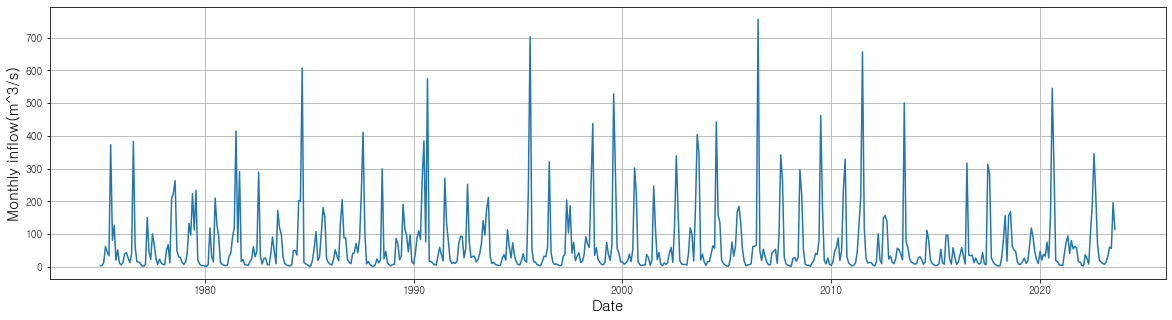

In [7]:
# 월 유입량 시각화
plt.figure(figsize=(20, 5))
plt.plot(rawdata['Inflow'])
plt.grid()
plt.ylabel('Monthly inflow(m^3/s)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.show()

In [8]:
# 월 유입량 기초통계량
rawdata['Inflow'].describe()

count    584.000000
mean      68.302791
std      104.856226
min        1.030000
25%       11.330000
50%       28.245000
75%       74.707500
max      756.200000
Name: Inflow, dtype: float64

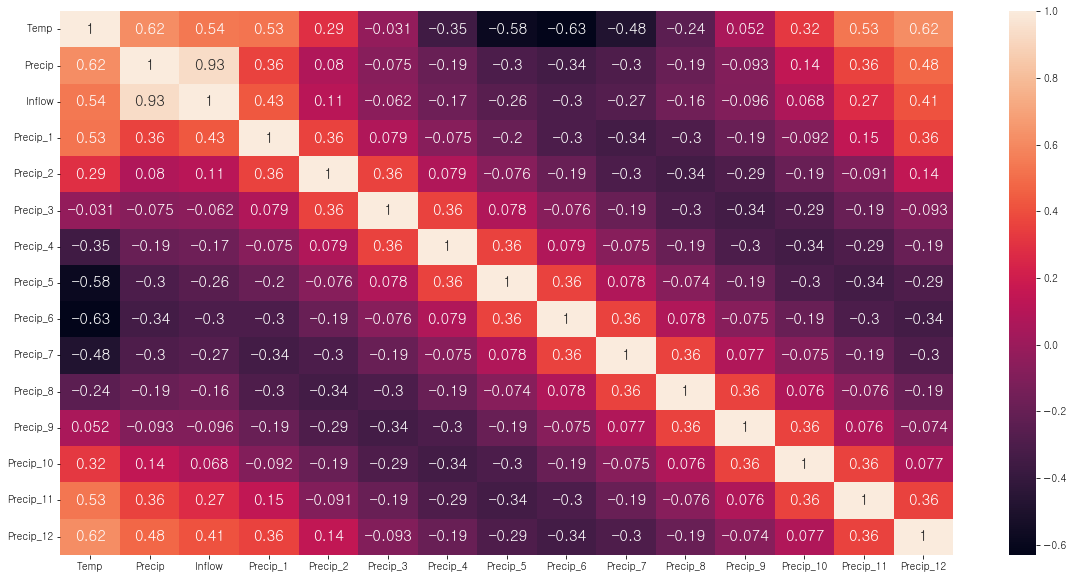

In [9]:
# 상관분석 시각화
plt.figure(figsize=(20, 10))
sns.heatmap(rawdata.corr(), annot=True, annot_kws={'fontsize' : 15, 'fontweight' : 'bold'})
plt.show()

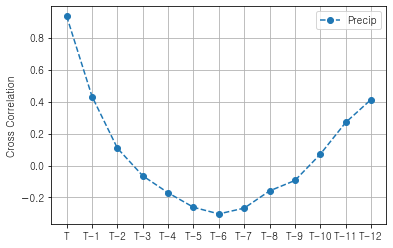

In [10]:
import statsmodels.api

plt.plot(['T', 'T-1', 'T-2', 'T-3', 'T-4', 'T-5', 'T-6', 'T-7', 'T-8', 'T-9', 'T-10', 'T-11', 'T-12'], 
         statsmodels.api.tsa.ccf(x=rawdata['Inflow'], y=rawdata['Precip'])[:13], 'o--', label='Precip')

plt.legend()
plt.grid()
plt.ylabel('Cross Correlation')
plt.show()

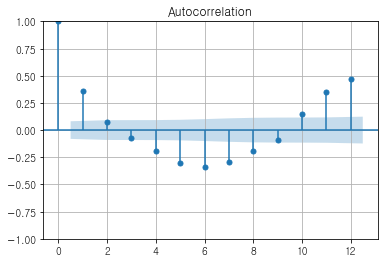

In [11]:
import statsmodels.graphics.tsaplots as sm

sm.plot_acf(rawdata['Precip'], lags=12)
plt.grid()
plt.show()

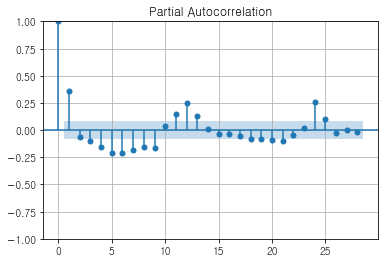

In [12]:
sm.plot_pacf(rawdata['Precip'])
plt.grid()
plt.show()

# PACF : t시점과 t-k(k=1, 2, 3, ...) 사이의 상관관계만 본다.

# 3. 월 유입량 예측

In [13]:
def relu(x):
    return np.maximum(x, 0)

def sigmoid(x):
    return 1 / (1 + tf.math.exp(-x))

def hidden_nodes(X):
    G = np.dot(X, input_weights) # XW
    G = G + biases # XW + B
    H = sigmoid(G) # H = g(XW + B)
    return H

def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

X = rawdata[['Temp', 'Precip', 'Precip_1']]
    
y = rawdata[['Inflow']].copy()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=32, shuffle=False)

# 스케일링 적용
scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

scaler.fit(x_train)
y_scaler.fit(y_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

####################################################################
# ELM input size, hidden size 설정

input_size = x_train_scaled.shape[1] # 컬럼 수 가져오기
hidden_size = 30 # hidden layer의 노드 수 설정

####################################################################
# ELM 구현

input_weights = np.random.normal(size=[input_size, hidden_size])
biases = np.random.normal(size=[hidden_size])

H = hidden_nodes(x_train_scaled)
H_t_H = np.dot(np.transpose(H), H)
inv_H_t_H = np.linalg.inv(H_t_H)
p_H = np.dot(inv_H_t_H, np.transpose(H))

output_weights = np.dot(p_H, y_train_scaled)

####################################################################

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_te = predict(x_test_scaled)
y_pred_te = y_pred_te.reshape(-1,)
y_pred_te = y_scaler.inverse_transform(np.array([0 if x < 0.0 else x for x in  y_pred_te]).reshape(-1, 1))

y_pred_tr = predict(x_train_scaled)
y_pred_tr = y_pred_tr.reshape(-1,)
y_pred_tr = y_scaler.inverse_transform(np.array([0 if x < 0.0 else x for x in  y_pred_tr]).reshape(-1, 1))

print('Train')
print('MSE : ', mean_squared_error(y_train, [0 if x < 0.0 else x for x in y_pred_tr]))
print('MAE : ', mean_absolute_error(y_train, [0 if x < 0.0 else x for x in y_pred_tr]))
print('R2 : ', r2_score(y_train, [0 if x < 0.0 else x for x in y_pred_tr]))
print('-'*50)

print('Test')
print('MSE : ', mean_squared_error(y_test, [0 if x < 0.0 else x for x in y_pred_te]))
print('MAE : ', mean_absolute_error(y_test, [0 if x < 0.0 else x for x in y_pred_te]))
print('R2 : ', r2_score(y_test, [0 if x < 0.0 else x for x in y_pred_te]))

Train
MSE :  794.6692756171418
MAE :  17.5556913982492
R2 :  0.9295630296429057
--------------------------------------------------
Test
MSE :  843.6130174708678
MAE :  18.82270971469988
R2 :  0.8516173390613994


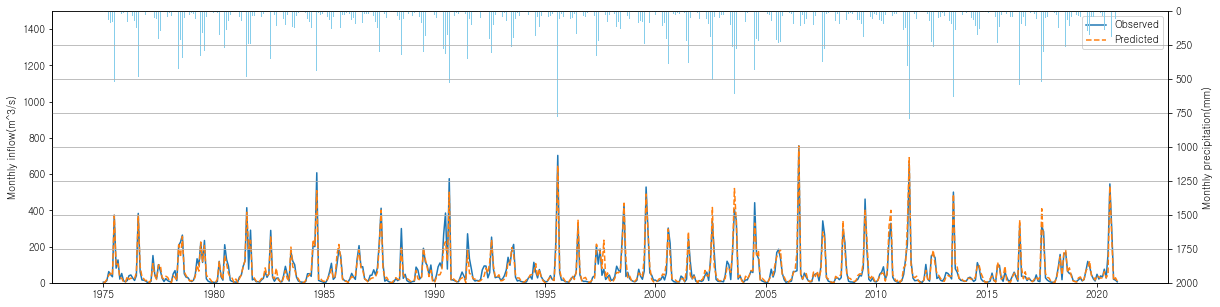

In [15]:
# Train 기간 시각화
fig, ax1 = plt.subplots(figsize=(20, 5))

ax1.plot(y_train.index, np.array(y_train), label='Observed')
ax1.plot(y_train.index, y_pred_tr.reshape(-1, 1), '--', label='Predicted')
ax1.set_ylim(0, 1500)
plt.ylabel('Monthly inflow(m^3/s)')
plt.xticks(rotation=0)
plt.legend()

ax2 = ax1.twinx()
ax2.bar(x=x_train.index, height=x_train['Precip'], width=10, color='skyblue', label='Precip')
ax2.set_ylim(0, 2000)
plt.ylabel('Monthly precipitation(mm)')
plt.gca().invert_yaxis()

plt.grid()
plt.show()

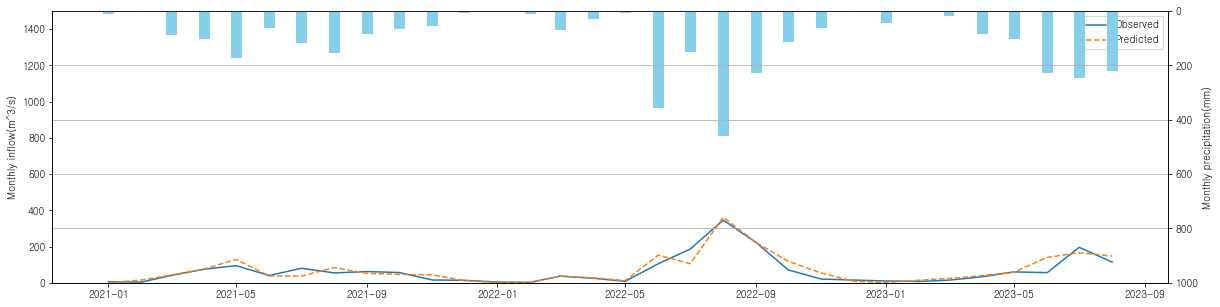

In [16]:
# Test 기간 시각화
fig, ax1 = plt.subplots(figsize=(20, 5))

ax1.plot(y_test.index, np.array(y_test), label='Observed')
ax1.plot(y_test.index, y_pred_te, '--', label='Predicted')
ax1.set_ylim(0, 1500)
plt.ylabel('Monthly inflow(m^3/s)')
plt.xticks(rotation=0)
plt.legend()

ax2 = ax1.twinx()
ax2.bar(x=x_test.index, height=x_test['Precip'], width=10, color='skyblue', label='Precip')
ax2.set_ylim(0, 1000)
plt.ylabel('Monthly precipitation(mm)')
plt.gca().invert_yaxis()

plt.grid()
plt.show()

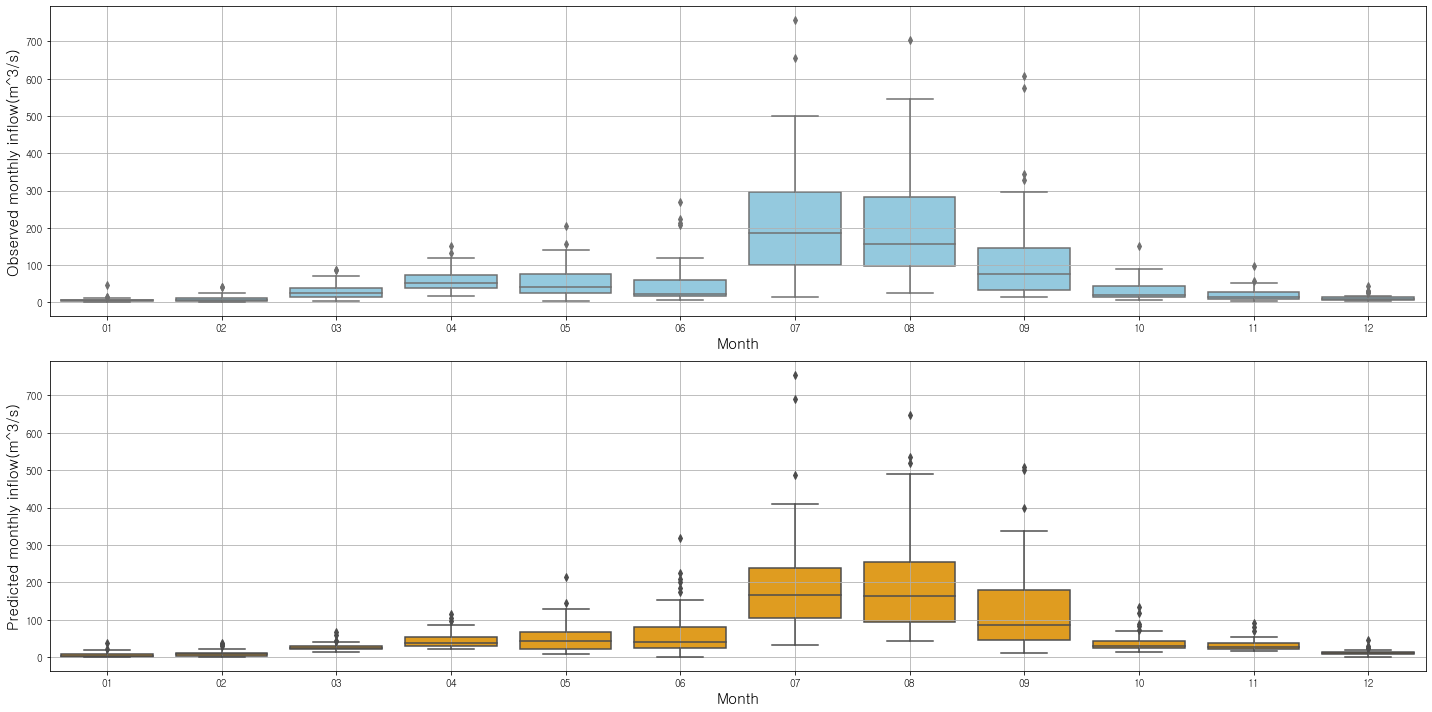

In [17]:
# Boxplot 시각화
result = pd.concat([pd.Series(y_pred_tr.reshape(-1,)), pd.Series(y_pred_te.reshape(-1, ))]).reset_index()
result = result.drop(columns=['index'])
result['Observed'] = y.values
result.columns = ['Predicted', 'Observed']
result.index = y.index

result['Month'] = [ str(x)[5:7] for x in result.index]

plt.figure(figsize=(20, 10))

plt.subplot(2,1,1)
sns.boxplot(x='Month', y='Observed', data=result, color='skyblue')
plt.grid()
plt.xticks(rotation=0)
plt.ylabel('Observed monthly inflow(m^3/s)', fontsize=15)
plt.xlabel('Month', fontsize=15)

plt.subplot(2,1,2)
sns.boxplot(x='Month', y='Predicted', data=result, color='orange')
plt.grid()
plt.xticks(rotation=0)
plt.ylabel('Predicted monthly inflow(m^3/s)', fontsize=15)
plt.xlabel('Month', fontsize=15)

plt.tight_layout()
plt.show()